# Load the dataset

In [1]:
import pandas as pd
import numpy as np
dataset = pd.read_csv('Datasets/Million_final.csv').drop('Unnamed: 0',axis=1)

In [3]:
features = pd.read_csv('Datasets/Feature_List.csv').drop('Unnamed: 0',axis=1)
features.info()
labels = dataset['song_hotttnesss']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   artist_familiarity          10000 non-null  float64
 1   artist_hotttnesss           10000 non-null  float64
 2   bars_confidence             10000 non-null  float64
 3   bars_start                  10000 non-null  float64
 4   beats_confidence            10000 non-null  float64
 5   beats_start                 10000 non-null  float64
 6   danceability                10000 non-null  float64
 7   duration                    10000 non-null  float64
 8   end_of_fade_in              10000 non-null  float64
 9   energy                      10000 non-null  float64
 10  key                         10000 non-null  float64
 11  key_confidence              10000 non-null  float64
 12  loudness                    10000 non-null  float64
 13  mode                        1000

# Scale the features in the range 0-1

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
scaled_f = sc.fit_transform(features)  
features = pd.DataFrame(scaled_f,columns=features.columns)

# Feature Selection process

In [5]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt

### Detect the optimal number of features

In [6]:
rfe_selector = RFECV(estimator=RandomForestClassifier(random_state=101), cv=StratifiedKFold(10), scoring='accuracy')
rfe_selector.fit(features, labels)
print('Optimal number of features: {}'.format(rfe_selector.n_features_))

Optimal number of features: 17


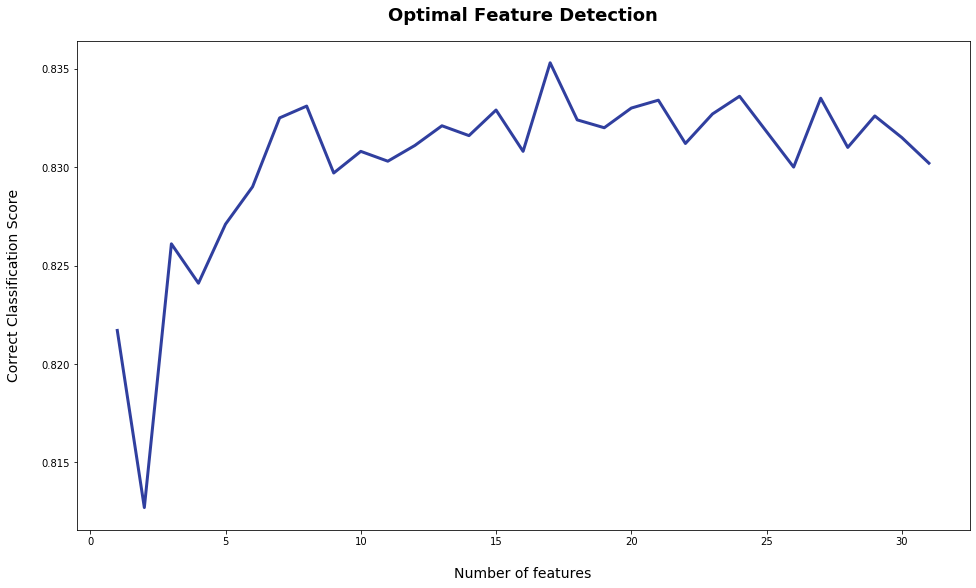

In [7]:
opt = plt.figure(figsize=(16, 9))
plt.title('Optimal Feature Detection', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features', fontsize=14, labelpad=20)
plt.ylabel('Correct Classification Score', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfe_selector.grid_scores_) + 1), rfe_selector.grid_scores_, color='#303F9F', linewidth=3)
plt.show()
opt.savefig('Optimal_features.png')

### Plot the no. of features and their accuracy

In [8]:
rfe_support = rfe_selector.get_support()
rfe_feature = features.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

17 selected features


### Creating a wordcloud of the selected features

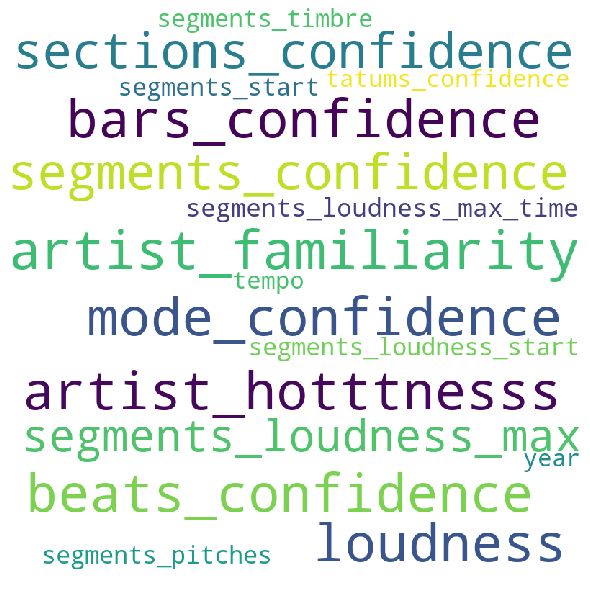

In [9]:
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS)
wc_features = ' '.join([str(elem) for elem in rfe_feature]) 
wordcloud = WordCloud(width = 800, height = 800,background_color ='white',min_font_size = 10,stopwords=stopwords).generate(wc_features)
wc = plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)   
plt.show() 
wc.savefig("Wordcloud.png")

### Saving the modified features and the dataset

In [10]:
features = features.loc[:,rfe_feature]
features.to_csv('Datasets/Feature_List.csv')